# Section 2, Task 1: Data Preprocessing and Exploration
## Iris Dataset Preprocessing Pipeline
**Objective:** Preprocess and explore the Iris dataset  
**Marks:** 15

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Load the Iris Dataset
Load data from sklearn's built-in dataset

In [2]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Clean column names
df.columns = [col.replace(' (cm)', '').replace(' ', '_') for col in df.columns]

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (150, 6)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'species_name']

First 5 rows:


,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Step 2: Check for Missing Values
Examine data quality and handle missing values if any

In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check data types
print("\nData types:")
print(df.dtypes)

# Basic statistics
print("\nBasic statistics (before normalization):")
df.describe()

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_name    0
dtype: int64

Total missing values: 0

Data types:
sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species            int64
species_name    category
dtype: object

Basic statistics (before normalization):


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Step 3: Normalize Features
Apply Min-Max scaling to normalize features to [0, 1] range

In [4]:
# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Apply scaling
df[feature_cols] = scaler.fit_transform(df[feature_cols])

print("Features normalized to range [0, 1]")
print("\nStatistics after normalization:")
df[feature_cols].describe()

Features normalized to range [0, 1]

Statistics after normalization:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## Step 4: Encode Class Labels
Encode the species names for machine learning algorithms

In [5]:
# Encode class labels
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species_name'])

print("Class encoding:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name}: {i}")

print("\nClass distribution:")
print(df['species_name'].value_counts())

Class encoding:
  setosa: 0
  versicolor: 1
  virginica: 2

Class distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Step 5: Exploratory Data Analysis - Summary Statistics
Compute and analyze summary statistics

In [6]:
# Summary statistics
print("Summary Statistics:")
print("="*50)
print(df.describe().round(3))

print("\nCorrelation Matrix:")
print("="*50)
corr_matrix = df[feature_cols].corr()
print(corr_matrix.round(3))

# Find highly correlated features
print("\nHighly correlated features (correlation > 0.8):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            print(f"  {corr_matrix.columns[i]} & {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width  species  \
count       150.000      150.000       150.000      150.000  150.000   
mean          0.429        0.441         0.467        0.458    1.000   
std           0.230        0.182         0.299        0.318    0.819   
min           0.000        0.000         0.000        0.000    0.000   
25%           0.222        0.333         0.102        0.083    0.000   
50%           0.417        0.417         0.568        0.500    1.000   
75%           0.583        0.542         0.695        0.708    2.000   
max           1.000        1.000         1.000        1.000    2.000   

       species_encoded  
count          150.000  
mean             1.000  
std              0.819  
min              0.000  
25%              0.000  
50%              1.000  
75%              2.000  
max              2.000  

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      

## Step 6: Visualization - Pairplot
Create pairplot to visualize relationships between features

<Figure size 1200x1000 with 0 Axes>

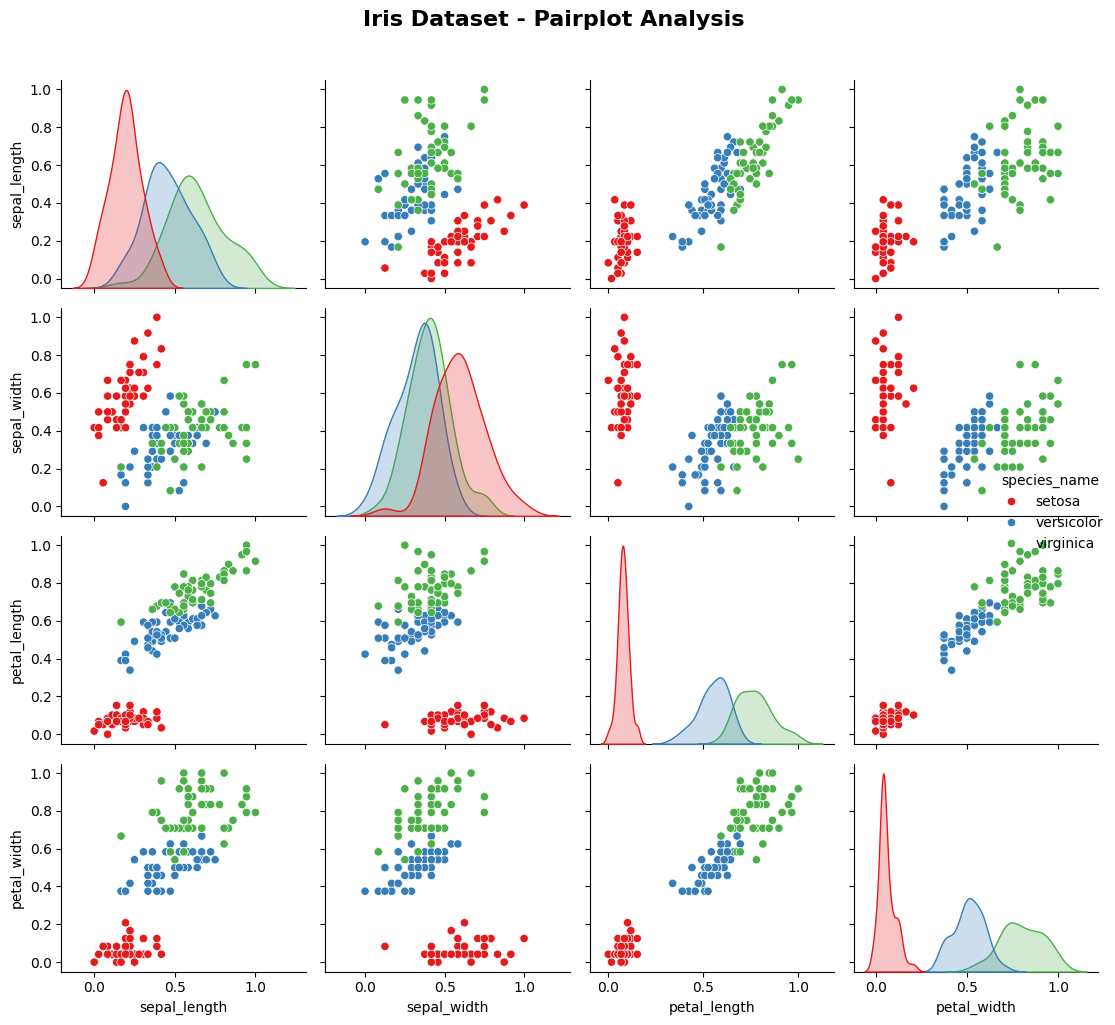

✓ Pairplot saved as 'iris_pairplot.png'


In [7]:
# Create pairplot
plt.figure(figsize=(12, 10))
pairplot_data = df[feature_cols + ['species_name']].copy()

# Create the pairplot
g = sns.pairplot(pairplot_data, hue='species_name', palette='Set1', 
                 diag_kind='kde', corner=False)
g.fig.suptitle('Iris Dataset - Pairplot Analysis', y=1.02, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('iris_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Pairplot saved as 'iris_pairplot.png'")

## Step 7: Visualization - Correlation Heatmap
Visualize feature correlations using a heatmap

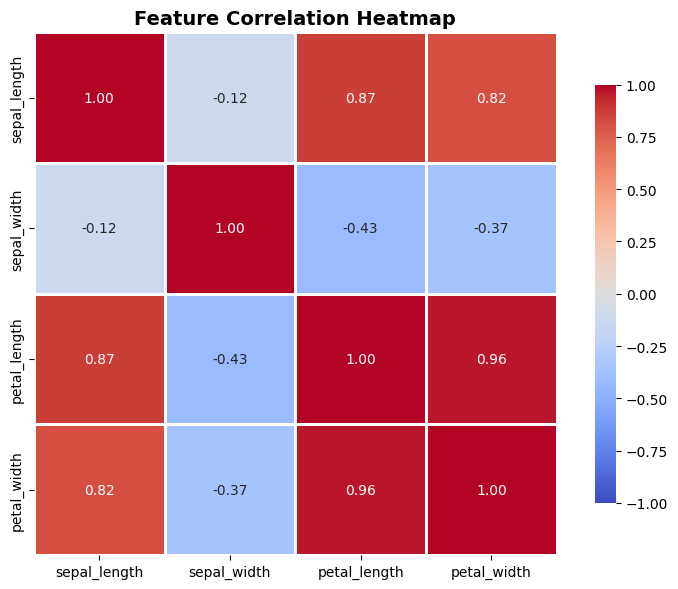

✓ Correlation heatmap saved as 'iris_correlation.png'


In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=1, cbar_kws={"shrink": 0.8},
           fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('iris_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Correlation heatmap saved as 'iris_correlation.png'")

## Step 8: Outlier Detection
Use boxplots to identify potential outliers in the data

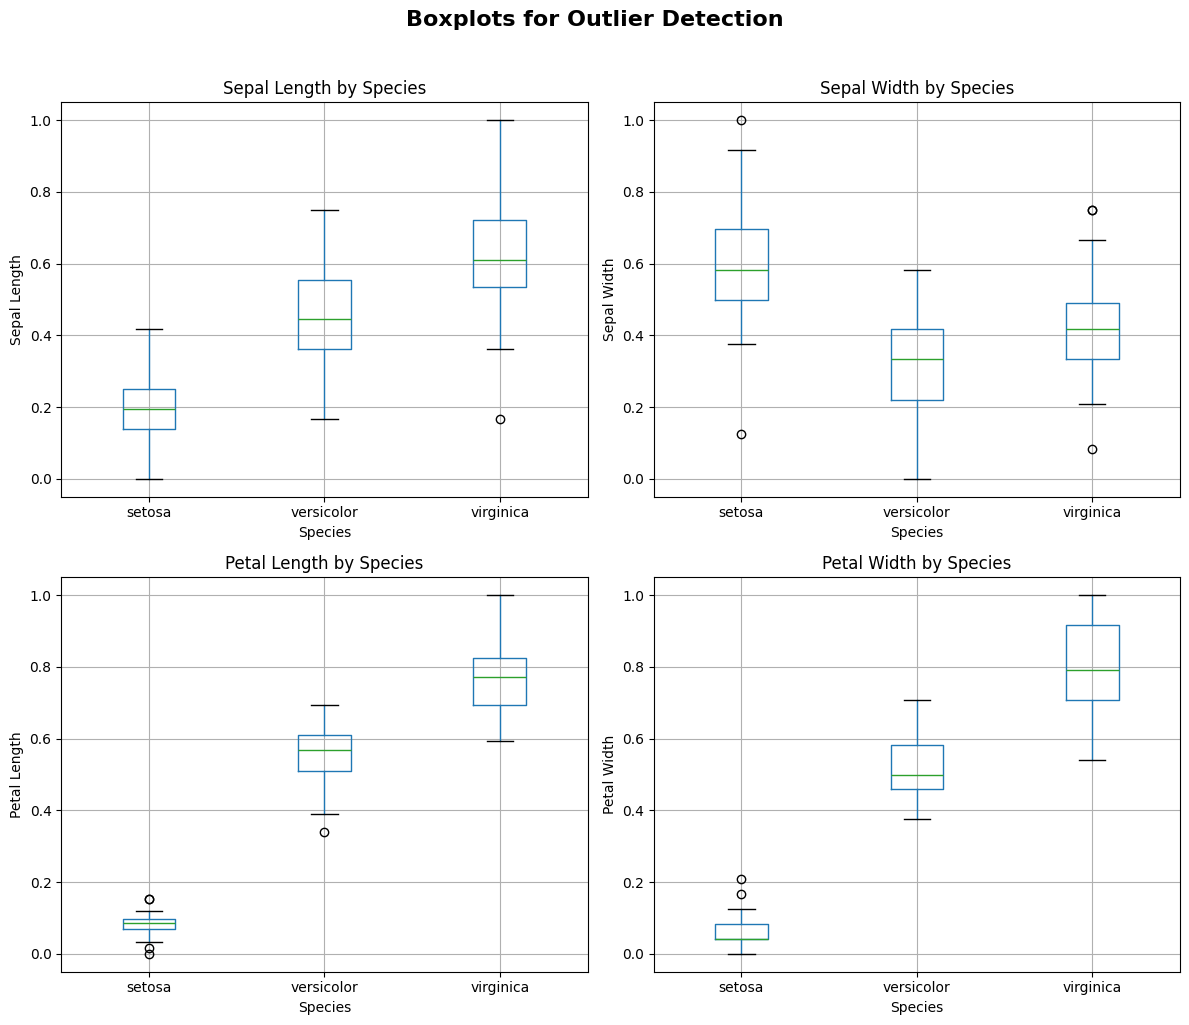

✓ Boxplots saved as 'iris_boxplots.png'

Outlier Detection (using IQR method):
  sepal_length: No outliers detected
  sepal_width: 4 outliers detected
  petal_length: No outliers detected
  petal_width: No outliers detected


In [9]:
# Boxplots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, col in enumerate(feature_cols):
    ax = axes[idx // 2, idx % 2]
    df.boxplot(column=col, by='species_name', ax=ax)
    ax.set_title(f'{col.replace("_", " ").title()} by Species')
    ax.set_xlabel('Species')
    ax.set_ylabel(col.replace("_", " ").title())
    ax.get_figure().suptitle('')

plt.suptitle('Boxplots for Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('iris_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Boxplots saved as 'iris_boxplots.png'")

# Identify outliers using IQR method
print("\nOutlier Detection (using IQR method):")
for col in feature_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        print(f"  {col}: {len(outliers)} outliers detected")
    else:
        print(f"  {col}: No outliers detected")

## Step 9: Train-Test Split
Split the data into training and testing sets (80-20 split)

In [10]:
# Prepare features and target
X = df[feature_cols]
y = df['species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split completed:")
print(f"  Training set: {len(X_train)} samples")
print(f"  Test set: {len(X_test)} samples")
print(f"  Test ratio: 20.0%")

# Verify stratification
print(f"\nClass distribution in splits:")
print(f"  Train: {pd.Series(y_train).value_counts().sort_index().to_dict()}")
print(f"  Test:  {pd.Series(y_test).value_counts().sort_index().to_dict()}")

Data split completed:
  Training set: 120 samples
  Test set: 30 samples
  Test ratio: 20.0%

Class distribution in splits:
  Train: {0: 40, 1: 40, 2: 40}
  Test:  {0: 10, 1: 10, 2: 10}


## Step 10: Save Preprocessed Data
Save the preprocessed dataset for future use

In [11]:
# Save preprocessed data
df.to_csv('preprocessed_iris.csv', index=False)
print("✓ Preprocessed data saved to 'preprocessed_iris.csv'")

# Summary
print("\n" + "="*60)
print("✅ PREPROCESSING PIPELINE COMPLETE!")
print("="*60)
print("\nGenerated files:")
print("  - preprocessed_iris.csv")
print("  - iris_pairplot.png")
print("  - iris_correlation.png")
print("  - iris_boxplots.png")
print("\n📊 Data ready for machine learning tasks!")

✓ Preprocessed data saved to 'preprocessed_iris.csv'

✅ PREPROCESSING PIPELINE COMPLETE!

Generated files:
  - preprocessed_iris.csv
  - iris_pairplot.png
  - iris_correlation.png
  - iris_boxplots.png

📊 Data ready for machine learning tasks!
